In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('Irish_Solar.csv',parse_dates=['Date'], index_col='Date',encoding= 'unicode_escape')
df.head()

,Temperature (°C),Radiation_direct_horizontal(W/m²),Radiation_diffuse_horizontal(W/m²),Sun Duration,Relative_humidity
Date,,,,,
2017-01-01 00:00:00,4.739,0.0,0.0,0.0,91
2017-01-01 01:00:00,4.416,0.0,0.0,0.0,95
2017-01-01 02:00:00,4.017,0.0,0.0,0.0,92
2017-01-01 03:00:00,3.597,0.0,0.0,0.0,90
2017-01-01 04:00:00,3.275,0.0,0.0,0.0,88


In [ ]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

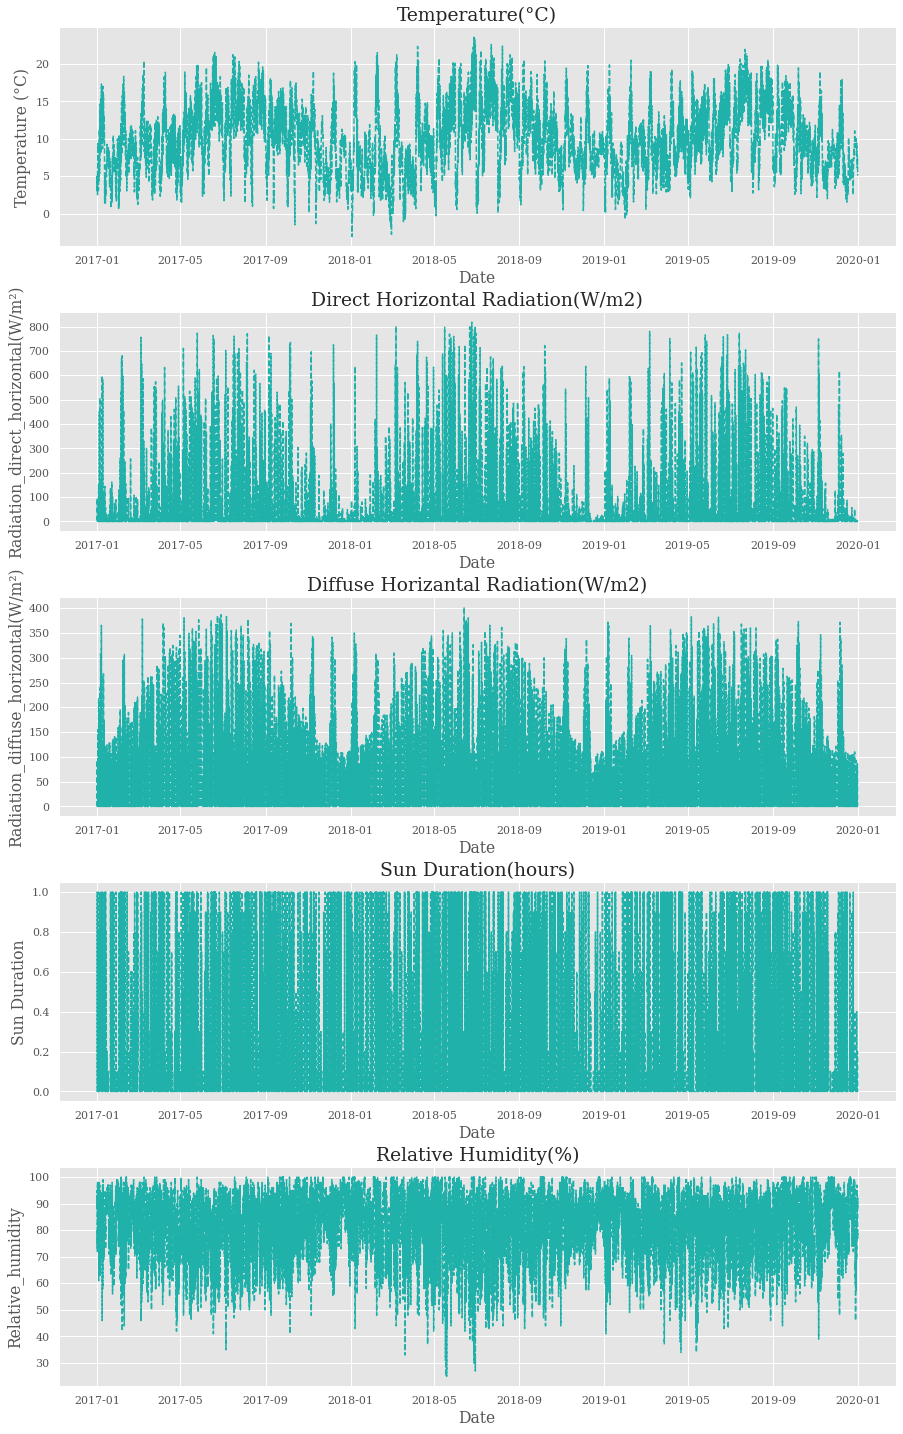

In [ ]:
import matplotlib.style as style 
sns.set(font_scale = 1)
style.use('ggplot')
plt.rcParams['font.family'] = "serif"
palette=("Blues_d")
plt.rcParams.update({'font.size': 13})

fig0, axes = plt.subplots(5, 1, figsize=(15, 25))#sharex=True)

df['Date'] = df.index
sns.lineplot(ax=axes[0], x=df.index, y='Temperature (°C)' ,data=df,linestyle='--',color='lightseagreen')
axes[0].set_title('Temperature(°C)')


sns.lineplot(ax=axes[1], x=df.index, y='Radiation_direct_horizontal(W/m²)',data=df, linestyle='--',color='lightseagreen')
axes[1].set_title('Direct Horizontal Radiation(W/m2)')


sns.lineplot(ax=axes[2], x=df.index, y='Radiation_diffuse_horizontal(W/m²)',data=df,linestyle='--',color='lightseagreen')
axes[2].set_title('Diffuse Horizantal Radiation(W/m2)')

sns.lineplot(ax=axes[3], x=df.index, y='Sun Duration',data=df,linestyle='--',color='lightseagreen')
axes[3].set_title('Sun Duration(hours)')

sns.lineplot(ax=axes[4], x=df.index, y='Relative_humidity',data=df, linestyle='--',color='lightseagreen')
axes[4].set_title('Relative Humidity(%)')



plt.subplots_adjust(hspace = 0.3 )
plt.savefig('solar-graphs.pdf')

In [ ]:
df_monthly=df.resample('M').mean()
df_monthly.head()

,Temperature (°C),Radiation_direct_horizontal(W/m²),Radiation_diffuse_horizontal(W/m²),Sun Duration,Relative_humidity,hour,day_of_month,day_of_week,month
Date,,,,,,,,,
2017-01-31,7.240722,29.647352,41.505278,0.113844,84.151882,11.5,16.0,2.935484,1.0
2017-02-28,8.464073,43.937833,51.771449,0.126786,83.720238,11.5,14.5,3.000000,2.0
2017-03-31,8.805007,58.524138,64.067417,0.169086,82.455645,11.5,16.0,3.000000,3.0
2017-04-30,8.857457,67.984367,90.756521,0.113056,79.683333,11.5,15.5,3.166667,4.0
2017-05-31,11.406216,102.451761,95.852069,0.221505,79.377688,11.5,16.0,2.806452,5.0


In [ ]:
df_monthly.shape

(37, 9)

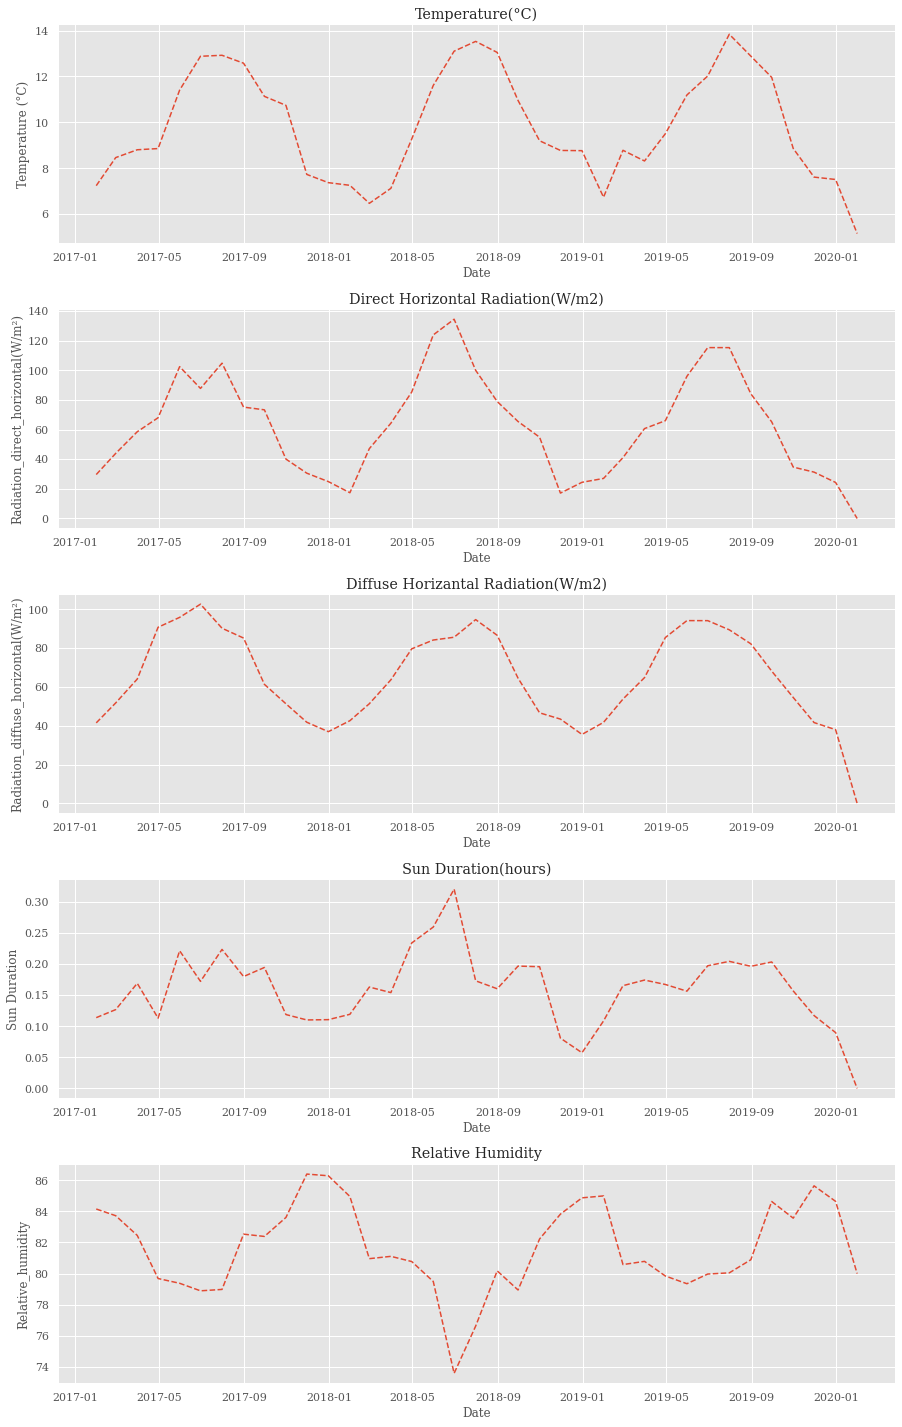

In [ ]:
import matplotlib.style as style 
sns.set(font_scale = 1)
style.use('ggplot')
plt.rcParams['font.family'] = "serif"
palette=("Blues_d")

fig, axes = plt.subplots(5, 1, figsize=(15, 25))#sharex=True)

df_monthly['Date'] = df_monthly.index
sns.lineplot(ax=axes[0], x=df_monthly.index, y='Temperature (°C)' ,data=df_monthly,linestyle='--')
axes[0].set_title('Temperature(°C)')


sns.lineplot(ax=axes[1], x=df_monthly.index, y='Radiation_direct_horizontal(W/m²)',data=df_monthly,linestyle='--')
axes[1].set_title('Direct Horizontal Radiation(W/m2)')


sns.lineplot(ax=axes[2], x=df_monthly.index, y='Radiation_diffuse_horizontal(W/m²)',data=df_monthly,linestyle='--')
axes[2].set_title('Diffuse Horizantal Radiation(W/m2)')

sns.lineplot(ax=axes[3], x=df_monthly.index, y='Sun Duration',data=df_monthly,linestyle='--')
axes[3].set_title('Sun Duration(hours)')

sns.lineplot(ax=axes[4], x=df_monthly.index, y='Relative_humidity',data=df_monthly,linestyle='--')
axes[4].set_title('Relative Humidity')



plt.subplots_adjust(hspace = 0.3 )

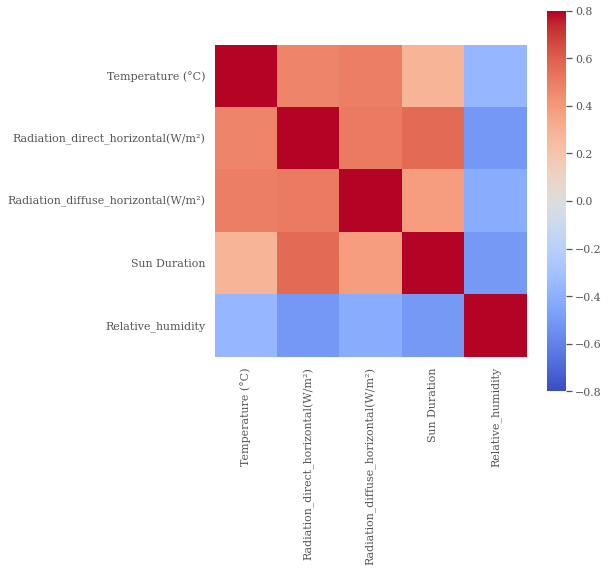

In [ ]:
corrmat = df.drop(['hour', 'day_of_month', 'day_of_week', 'month'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

